### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import geopandas as gpd
from mf6Voronoi.geoVoronoi import createVoronoi
from mf6Voronoi.geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList

In [2]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='regionalModel',maxRef = 500, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../examples/regionalModel/shp/Angascancha_Basin_Extension.shp')
vorMesh.addLayer('river','../../examples/regionalModel/shp/rios.shp',50)


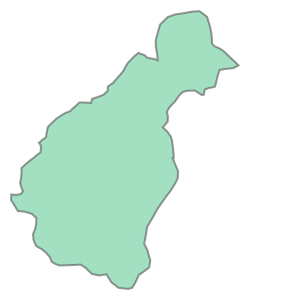

In [13]:
vorMesh.modelDis['limitGeometry']

In [ ]:
#Generate point pair array
vorMesh.generateOrgDistVertices()


In [ ]:

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()


In [ ]:

#Export generated voronoi mesh
vorMesh.getVoronoiAsShp(outputPath='output')

In [ ]:
#Export point data and voronoi polygons

outPath = 'output'
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
#vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

#vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


In [ ]:
plotOrgDistPoints(vorMesh)

In [ ]:
plotCirclesPoints(vorMesh)

In [ ]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

In [ ]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')

In [ ]:
#check mesh generation
from mf6Voronoi.meshProperties import meshShape

In [ ]:
# open the mesh file
mesh=meshShape(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')

In [ ]:
# get the list of vertices and cell2d data
gridprops=mesh.get_gridprops_disv()

In [ ]:
cell2d = gridprops['cell2d']           #cellid, cell centroid xy, vertex number and vertex id list
vertices = gridprops['vertices']       #vertex id and xy coordinates
ncpl = gridprops['ncpl']               #number of cells per layer
nvert = gridprops['nvert']             #number of verts
centroids=gridprops['centroids']  

In [ ]:
#check or create an output folder
jsonPath = (outPath+'/'+vorMesh.modelDis['meshName'])
if os.path.isdir(jsonPath):
    print('The output folder %s exists'%jsonPath)
else:
    os.mkdir(jsonPath)
    print('The output folder %s has been generated.'%jsonPath)
    
mesh.save_properties(os.path.join(jsonPath,'disvDict.json'))